# Simple Fake Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

def generate_synthetic_data(
    n_hc_subjects=200,
    n_pd_subjects=200,
    min_weeks=40,
    max_weeks=52,
    noise_level=4,
    pd_decline_rate=0.01,
    seed=42
):
    """
    Generate synthetic activity data with:
    - HC subjects: flat activity profile over time (with noise)
    - PD subjects: declining activity over time (with noise)
    
    Args:
        n_hc_subjects (int): Number of healthy control subjects
        n_pd_subjects (int): Number of Parkinson's disease subjects
        min_weeks (int): Minimum number of weeks per subject
        max_weeks (int): Maximum number of weeks per subject
        noise_level (float): Standard deviation of random noise
        pd_decline_rate (float): Rate of decline for PD subjects per week
        seed (int): Random seed for reproducibility
        
    Returns:
        pd.DataFrame: DataFrame with synthetic data
    """
    np.random.seed(seed)
    
    # Day-of-week base activity patterns
    # Weekend (Sat-Sun) has higher activity than weekdays
    base_pattern = np.array([30, 30, 30, 30, 30, 40, 36])
    
    all_data = []
    
    # Generate HC subjects (stable activity)
    for subject_id in range(1, n_hc_subjects + 1):
        n_weeks = np.random.randint(min_weeks, max_weeks + 1)
        
        for week in range(1, n_weeks + 1):
            # Base activity with noise
            activity = base_pattern + np.random.normal(0, noise_level, 7)
            
            # Ensure values are positive and reasonable
            activity = np.clip(activity, 0.1, 200)
            
            all_data.append({
                'subject': f'HC_{subject_id}',
                'cohort': 'Control',
                'week_num': week,
                'Mon': activity[0],
                'Tue': activity[1],
                'Wed': activity[2],
                'Thu': activity[3],
                'Fri': activity[4],
                'Sat': activity[5],
                'Sun': activity[6]
            })
    
    # Generate PD subjects (declining activity)
    for subject_id in range(1, n_pd_subjects + 1):
        n_weeks = np.random.randint(min_weeks, max_weeks + 1)
        
        for week in range(1, n_weeks + 1):
            # Base activity with decline and noise
            decline_factor = 1.0 - (week * pd_decline_rate)
            activity = base_pattern * decline_factor + np.random.normal(0, noise_level, 7)
            
            # Ensure values are positive and reasonable
            activity = np.clip(activity, 0.1, 200)
            
            all_data.append({
                'subject': f'PD_{subject_id}',
                'cohort': 'PD',
                'week_num': week,
                'Mon': activity[0],
                'Tue': activity[1],
                'Wed': activity[2],
                'Thu': activity[3],
                'Fri': activity[4],
                'Sat': activity[5],
                'Sun': activity[6]
            })
    
    # Create DataFrame
    df = pd.DataFrame(all_data)
    
    return df


In [25]:

def plot_synthetic_data(df, n_subjects_to_plot=5):
    """
    Visualize the synthetic data by plotting activity levels over time.
    
    Args:
        df (pd.DataFrame): DataFrame with synthetic data
        n_subjects_to_plot (int): Number of subjects from each cohort to plot
    """
    plt.figure(figsize=(14, 10))
    
    # Calculate mean daily activity for each subject and week
    df['mean_activity'] = df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']].mean(axis=1)
    
    # Get unique subjects from each cohort
    hc_subjects = df[df['cohort'] == 'Control']['subject'].unique()
    pd_subjects = df[df['cohort'] == 'PD']['subject'].unique()
    
    # Randomly select subjects to plot
    np.random.shuffle(hc_subjects)
    np.random.shuffle(pd_subjects)
    hc_to_plot = hc_subjects[:n_subjects_to_plot]
    pd_to_plot = pd_subjects[:n_subjects_to_plot]
    
    # Plot HC subjects
    for subject in hc_to_plot:
        subject_data = df[df['subject'] == subject]
        plt.plot(subject_data['week_num'], subject_data['mean_activity'], 'b-', alpha=0.5)
    
    # Plot PD subjects
    for subject in pd_to_plot:
        subject_data = df[df['subject'] == subject]
        plt.plot(subject_data['week_num'], subject_data['mean_activity'], 'r-', alpha=0.5)
    
    # Add cohort averages
    hc_avg = df[df['cohort'] == 'Control'].groupby('week_num')['mean_activity'].mean()
    pd_avg = df[df['cohort'] == 'PD'].groupby('week_num')['mean_activity'].mean()
    
    plt.plot(hc_avg.index, hc_avg.values, 'b-', linewidth=1, label='HC Average')
    plt.plot(pd_avg.index, pd_avg.values, 'r-', linewidth=1, label='PD Average')
    
    plt.xlabel('Week Number')
    plt.ylabel('Mean Daily Activity')
    plt.title('Synthetic Activity Data: HC vs PD Subjects')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


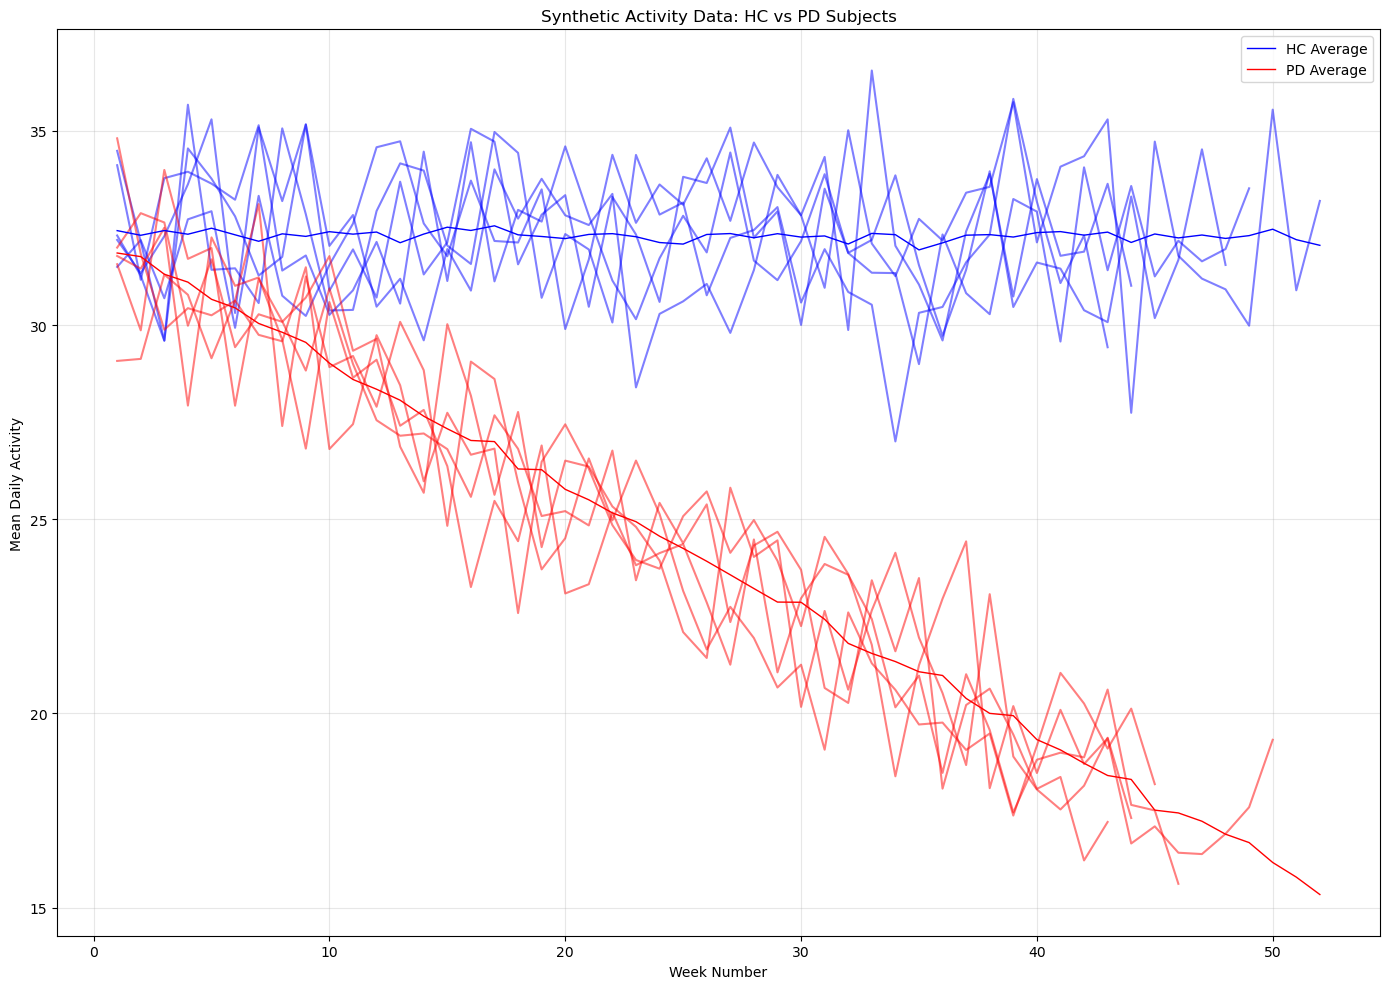

In [26]:
# test out the fake data functions
synthetic_df = generate_synthetic_data()

# plot the synthetic data
plot_synthetic_data(synthetic_df)

In [27]:
print(synthetic_df.tail(20))

      subject cohort  week_num        Mon        Tue        Wed        Thu  \
18303  PD_200     PD        26  25.515919  23.813100  19.831625  27.955432   
18304  PD_200     PD        27  26.608692  17.329801  18.968962  17.767042   
18305  PD_200     PD        28  15.667028  22.137603  14.727125  25.328410   
18306  PD_200     PD        29  17.412106  22.301486  24.168530  22.541150   
18307  PD_200     PD        30  21.853594  21.909702  19.759356  19.487554   
18308  PD_200     PD        31  24.516675  17.754344  22.966186  16.346214   
18309  PD_200     PD        32  17.199333  21.015497  25.431663  25.003465   
18310  PD_200     PD        33  16.570197  15.714494  27.973566  13.526980   
18311  PD_200     PD        34  12.767358  28.217125  22.979920  24.106712   
18312  PD_200     PD        35  14.918104  16.374258  12.654336  18.945454   
18313  PD_200     PD        36  21.595903  27.350648  18.936411  23.933857   
18314  PD_200     PD        37  23.905084  11.353598  22.281009 

In [28]:
# Add year column 
synthetic_df['year'] = 2023

In [29]:
# output the synthetic data to a csv file
synthetic_df.to_csv('fake_data.csv', index=False)

# Individualized Fake Data 

Want to mimic different trajectories of ambulatory activity, even among the cohorts of PDs and HCs. 

In [30]:
import numpy as np
import pandas as pd
from scipy.special import expit  # For sigmoid function
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [31]:

def generate_enhanced_synthetic_data(
    n_hc_subjects=200,
    n_pd_subjects=200,
    min_weeks=40,
    max_weeks=52,
    base_noise_level=3,
    seed=42
):
    """
    Generate synthetic activity data with complex patterns:
    - HC subjects: different subgroups with varied activity levels
    - PD subjects: various decline patterns (linear, exponential, sigmoid, step)
    - Seasonal variations
    - Individual variability
    - Weekend vs weekday patterns
    
    Args:
        n_hc_subjects (int): Number of healthy control subjects
        n_pd_subjects (int): Number of Parkinson's disease subjects
        min_weeks (int): Minimum number of weeks per subject
        max_weeks (int): Maximum number of weeks per subject
        base_noise_level (float): Base standard deviation for random noise
        seed (int): Random seed for reproducibility
        
    Returns:
        pd.DataFrame: DataFrame with synthetic data
    """
    np.random.seed(seed)
    
    # Define HC subgroups
    hc_subgroups = {
        'very_active': {
            'proportion': 0.3,  # 30% of HC subjects
            'base_activity': np.array([45, 45, 45, 45, 45, 55, 50]),
            'noise_level': base_noise_level * 1.2  # More variability
        },
        'moderately_active': {
            'proportion': 0.4,  # 40% of HC subjects
            'base_activity': np.array([30, 30, 30, 30, 30, 40, 36]),
            'noise_level': base_noise_level
        },
        'less_active': {
            'proportion': 0.3,  # 30% of HC subjects
            'base_activity': np.array([20, 20, 20, 20, 20, 28, 25]),
            'noise_level': base_noise_level * 0.8
        }
    }
    
    # Define PD subgroups with different decline patterns
    pd_subgroups = {
        'rapid_decline': {
            'proportion': 0.25,  # 25% of PD subjects
            'base_activity': np.array([28, 28, 28, 28, 28, 36, 33]),
            'noise_level': base_noise_level,
            'decline_type': 'exponential',
            'decline_rate': 0.04  # Faster decline
        },
        'moderate_decline': {
            'proportion': 0.35,  # 35% of PD subjects
            'base_activity': np.array([30, 30, 30, 30, 30, 38, 35]),
            'noise_level': base_noise_level,
            'decline_type': 'linear',
            'decline_rate': 0.015  # Moderate decline
        },
        'slow_decline': {
            'proportion': 0.25,  # 25% of PD subjects
            'base_activity': np.array([32, 32, 32, 32, 32, 40, 37]),
            'noise_level': base_noise_level * 0.9,
            'decline_type': 'sigmoid',
            'decline_rate': 0.01  # Slower decline
        },
        'step_decline': {
            'proportion': 0.15,  # 15% of PD subjects
            'base_activity': np.array([31, 31, 31, 31, 31, 39, 36]),
            'noise_level': base_noise_level * 1.1,
            'decline_type': 'step',
            'decline_rate': 0.02  # Step-wise decline
        }
    }
    
    # Verify proportions sum to 1.0
    assert sum(sg['proportion'] for sg in hc_subgroups.values()) == 1.0
    assert sum(sg['proportion'] for sg in pd_subgroups.values()) == 1.0
    
    # Calculate cumulative proportions for sampling
    hc_cum_props = np.cumsum([sg['proportion'] for sg in hc_subgroups.values()])
    pd_cum_props = np.cumsum([sg['proportion'] for sg in pd_subgroups.values()])
    hc_subgroup_names = list(hc_subgroups.keys())
    pd_subgroup_names = list(pd_subgroups.keys())
    
    # Start date for seasonal variations (assuming Jan 1, 2023)
    start_date = datetime(2023, 1, 1)
    
    all_data = []
    
    # Generate HC subjects
    for subject_id in range(1, n_hc_subjects + 1):
        # Determine subject's subgroup
        r = np.random.random()
        subgroup_idx = np.searchsorted(hc_cum_props, r)
        subgroup = hc_subgroup_names[subgroup_idx]
        subgroup_params = hc_subgroups[subgroup]
        
        # Individual variation in baseline (±20% from subgroup baseline)
        individual_factor = np.random.uniform(0.8, 1.2)
        
        # Individual variation in noise level
        individual_noise = subgroup_params['noise_level'] * np.random.uniform(0.8, 1.2)
        
        # Number of weeks for this subject
        n_weeks = np.random.randint(min_weeks, max_weeks + 1)
        
        # Generate activity data for each week
        for week in range(1, n_weeks + 1):
            # Date for this week (for seasonal effects)
            current_date = start_date + timedelta(weeks=week-1)
            year = current_date.year
            month = current_date.month
            
            # Seasonal factor: activity tends to be higher in summer, lower in winter
            # Simple sinusoidal model with peak in July (month 7)
            seasonal_factor = 1 + 0.1 * np.sin(2 * np.pi * (month - 1) / 12 - np.pi/2)
            
            # Base activity with individual, seasonal factors and noise
            base_activity = subgroup_params['base_activity'] * individual_factor * seasonal_factor
            activity = base_activity + np.random.normal(0, individual_noise, 7)
            
            # Ensure values are positive and reasonable
            activity = np.clip(activity, 0.1, 200)
            
            all_data.append({
                'subject': f'HC_{subject_id}',
                'cohort': 'Control',
                'subgroup': subgroup,
                'week_num': week,
                'date': current_date.strftime('%Y-%m-%d'),
                'year': year,
                'month': month,
                'Mon': activity[0],
                'Tue': activity[1],
                'Wed': activity[2],
                'Thu': activity[3],
                'Fri': activity[4],
                'Sat': activity[5],
                'Sun': activity[6]
            })
    
    # Generate PD subjects
    for subject_id in range(1, n_pd_subjects + 1):
        # Determine subject's subgroup
        r = np.random.random()
        subgroup_idx = np.searchsorted(pd_cum_props, r)
        subgroup = pd_subgroup_names[subgroup_idx]
        subgroup_params = pd_subgroups[subgroup]
        
        # Individual variation in baseline (±20% from subgroup baseline)
        individual_factor = np.random.uniform(0.8, 1.2)
        
        # Individual variation in decline rate (±30% from subgroup rate)
        individual_decline_rate = subgroup_params['decline_rate'] * np.random.uniform(0.7, 1.3)
        
        # Individual variation in noise level
        individual_noise = subgroup_params['noise_level'] * np.random.uniform(0.8, 1.2)
        
        # Number of weeks for this subject
        n_weeks = np.random.randint(min_weeks, max_weeks + 1)
        
        # Inflection point for sigmoid decline (random point within the time series)
        inflection_week = np.random.randint(int(n_weeks * 0.3), int(n_weeks * 0.7))
        
        # Step decline points (1-3 random points)
        n_steps = np.random.randint(1, 4)
        step_weeks = sorted(np.random.choice(range(5, n_weeks-5), n_steps, replace=False))
        step_sizes = np.random.uniform(0.05, 0.15, n_steps)  # 5-15% decrease per step
        
        # Generate activity data for each week
        for week in range(1, n_weeks + 1):
            # Date for this week (for seasonal effects)
            current_date = start_date + timedelta(weeks=week-1)
            year = current_date.year
            month = current_date.month
            
            # Seasonal factor: activity tends to be higher in summer, lower in winter
            seasonal_factor = 1 + 0.1 * np.sin(2 * np.pi * (month - 1) / 12 - np.pi/2)
            
            # Calculate decline factor based on decline type
            if subgroup_params['decline_type'] == 'linear':
                decline_factor = 1.0 - (week * individual_decline_rate)
            elif subgroup_params['decline_type'] == 'exponential':
                decline_factor = np.exp(-individual_decline_rate * week)
            elif subgroup_params['decline_type'] == 'sigmoid':
                # Sigmoid function centered at inflection point
                x = (week - inflection_week) * individual_decline_rate * 5  # Scale factor for steepness
                decline_factor = 1.0 - 0.5 * (1 + expit(x))
            elif subgroup_params['decline_type'] == 'step':
                # Step-wise decline
                decline_factor = 1.0
                for step_idx, step_week in enumerate(step_weeks):
                    if week > step_week:
                        decline_factor -= step_sizes[step_idx]
            
            # Ensure decline factor doesn't go below 0.3 (70% max decline)
            decline_factor = max(decline_factor, 0.3)
            
            # Base activity with individual, seasonal, decline factors and noise
            base_activity = subgroup_params['base_activity'] * individual_factor * seasonal_factor * decline_factor
            activity = base_activity + np.random.normal(0, individual_noise, 7)
            
            # Ensure values are positive and reasonable
            activity = np.clip(activity, 0.1, 200)
            
            all_data.append({
                'subject': f'PD_{subject_id}',
                'cohort': 'PD',
                'subgroup': subgroup,
                'week_num': week,
                'date': current_date.strftime('%Y-%m-%d'),
                'year': year,
                'month': month,
                'decline_type': subgroup_params['decline_type'],
                'Mon': activity[0],
                'Tue': activity[1],
                'Wed': activity[2],
                'Thu': activity[3],
                'Fri': activity[4],
                'Sat': activity[5],
                'Sun': activity[6]
            })
    
    # Create DataFrame
    df = pd.DataFrame(all_data)
    
    return df

In [32]:

def plot_example_trajectories(df, n_examples=3, figsize=(15, 10)):
    """
    Plot example activity trajectories from each subgroup
    
    Args:
        df (pd.DataFrame): DataFrame with synthetic data
        n_examples (int): Number of examples to plot per subgroup
        figsize (tuple): Figure size
    """
    # Calculate weekly average activity for each subject
    df['weekly_avg'] = df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']].mean(axis=1)
    
    # Get unique subgroups
    hc_subgroups = df[df['cohort'] == 'Control']['subgroup'].unique()
    pd_subgroups = df[df['cohort'] == 'PD']['subgroup'].unique()
    
    # Set up plot
    fig, axes = plt.subplots(2, max(len(hc_subgroups), len(pd_subgroups)), figsize=figsize)
    
    # Plot HC subjects
    for i, subgroup in enumerate(hc_subgroups):
        ax = axes[0, i]
        
        # Select random subjects from this subgroup
        subjects = np.random.choice(
            df[(df['cohort'] == 'Control') & (df['subgroup'] == subgroup)]['subject'].unique(),
            min(n_examples, len(df[(df['cohort'] == 'Control') & (df['subgroup'] == subgroup)]['subject'].unique())),
            replace=False
        )
        
        for subject in subjects:
            subject_data = df[df['subject'] == subject].sort_values('week_num')
            ax.plot(subject_data['week_num'], subject_data['weekly_avg'], '-o', markersize=3, label=subject)
        
        ax.set_title(f'HC: {subgroup}')
        ax.set_xlabel('Week')
        ax.set_ylabel('Average Daily Activity (minutes)')
        ax.grid(True, alpha=0.3)
        
        if i == len(hc_subgroups) - 1:
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Plot PD subjects
    for i, subgroup in enumerate(pd_subgroups):
        ax = axes[1, i]
        
        # Select random subjects from this subgroup
        subjects = np.random.choice(
            df[(df['cohort'] == 'PD') & (df['subgroup'] == subgroup)]['subject'].unique(),
            min(n_examples, len(df[(df['cohort'] == 'PD') & (df['subgroup'] == subgroup)]['subject'].unique())),
            replace=False
        )
        
        for subject in subjects:
            subject_data = df[df['subject'] == subject].sort_values('week_num')
            ax.plot(subject_data['week_num'], subject_data['weekly_avg'], '-o', markersize=3, label=subject)
        
        ax.set_title(f'PD: {subgroup}')
        ax.set_xlabel('Week')
        ax.set_ylabel('Average Daily Activity (minutes)')
        ax.grid(True, alpha=0.3)
        
        if i == len(pd_subgroups) - 1:
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return fig


Generated 18418 records for 400 subjects
HC subjects: 200
PD subjects: 200

Activity by subgroup (weekly average minutes):
                                mean       std        min        max
cohort  subgroup                                                    
Control less_active        21.482182  2.967173  14.112937  29.189964
        moderately_active  33.108171  4.512235  20.918850  46.427644
        very_active        47.058667  6.897767  31.638755  65.656407
PD      moderate_decline   20.462365  6.202883   6.066903  35.346522
        rapid_decline      14.562312  5.686986   4.584665  32.128946
        slow_decline       10.457980  1.604600   5.380019  16.824801
        step_decline       29.265937  5.086466  17.210558  43.485897


<Figure size 1500x1000 with 0 Axes>

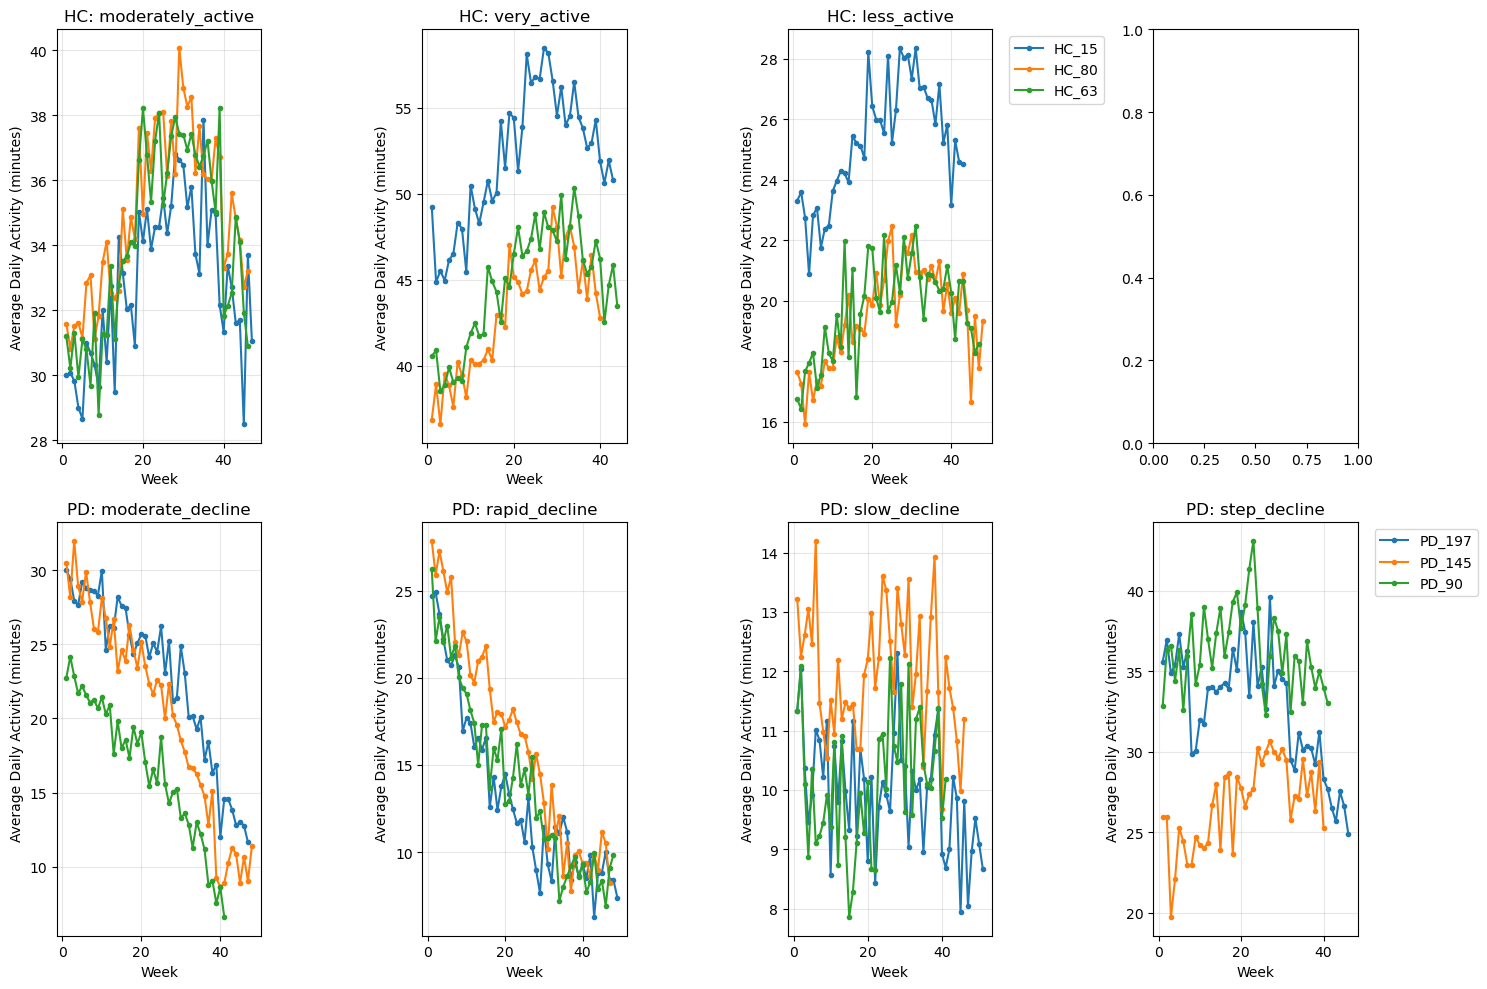

In [33]:
# Generate synthetic data
df1 = generate_enhanced_synthetic_data(
    n_hc_subjects=200,
    n_pd_subjects=200,
    min_weeks=40,
    max_weeks=52,
    base_noise_level=3,
    seed=42
    )
    
# Display basic statistics
print(f"Generated {len(df1)} records for {df1['subject'].nunique()} subjects")
print(f"HC subjects: {df1[df1['cohort'] == 'Control']['subject'].nunique()}")
print(f"PD subjects: {df1[df1['cohort'] == 'PD']['subject'].nunique()}")
    
# Summary by subgroup
print("\nActivity by subgroup (weekly average minutes):")
day_cols = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df1['weekly_avg'] = df1[day_cols].mean(axis=1)
    
subgroup_summary = df1.groupby(['cohort', 'subgroup'])['weekly_avg'].agg(['mean', 'std', 'min', 'max'])
print(subgroup_summary)
    
# Plot example trajectories
plt.figure(figsize=(15, 10))
plot_example_trajectories(df1)
plt.show()

In [34]:
print(df1.tail())

# save the data to a csv file
df1.to_csv('enhanced_fake_data.csv', index=False)

      subject cohort       subgroup  week_num        date  year  month  \
18413  PD_200     PD  rapid_decline        43  2023-10-22  2023     10   
18414  PD_200     PD  rapid_decline        44  2023-10-29  2023     10   
18415  PD_200     PD  rapid_decline        45  2023-11-05  2023     11   
18416  PD_200     PD  rapid_decline        46  2023-11-12  2023     11   
18417  PD_200     PD  rapid_decline        47  2023-11-19  2023     11   

             Mon        Tue        Wed       Thu        Fri        Sat  \
18413  12.180682   3.205703   6.434392  8.717928   7.071271  11.867912   
18414   6.318736   7.682095   1.918044  6.826817   6.494815  10.577110   
18415  10.969956  11.193979  10.420175  5.953746  11.710343   5.218916   
18416   7.031633  10.482157   9.270316  8.992806   5.044355   8.898817   
18417   6.020245   8.038012   2.471093  9.579829  10.492384   8.709737   

            Sun decline_type  weekly_avg  
18413  8.544214  exponential    8.288872  
18414  8.873641  exponen